<h1>Business Case</h1>

How can accident respose teams be best deployed? Every City has a limited amount of accident response resources 
including police, paramedics, and fire departments.  This analysis will help inform them about how to better manage 
staffing and general preparedness for accidents during different weather condidions.  Additionally it may help guide
infastructure decisions, what about these high level of accidents locations is causing the spike in accidents and if there is a way to fix
them.

In [16]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_644dfceb6d68471ea20a550a2f41bc3b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='AhpqSjZNn_dHl3XHzzqe8-bp05Q74BVDiaUciCjYAsTD',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_644dfceb6d68471ea20a550a2f41bc3b.get_object(Bucket='course9capstone-donotdelete-pr-7ewgfktlgfywok',Key='DataCollisionsExample.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<b> Data </b> 

The data can be seperated by severity with two values; 1 or 2.  after removing 'WEATHER' data that was listed as 
unkown ther are still 189592 samples, more than enough to provide a good picture of where and when accidents are 
occuring. 

In [17]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [19]:
dft = df[['SEVERITYCODE', 'WEATHER', 'X', 'Y']]
dft.head()

,SEVERITYCODE,WEATHER,X,Y
0,2,Overcast,-122.323148,47.703140
1,1,Raining,-122.347294,47.647172
2,1,Overcast,-122.334540,47.607871
3,1,Clear,-122.334803,47.604803
4,2,Raining,-122.306426,47.545739


There are 10 distinct weather condidions which may cause a confusing visual, the data may need to be
trimmed to only include the top 5 most common reported weather conditions during accident.

In [11]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

The data will be cleaned by removing all unknown weather condidions as that data is of no value for this analysis.  Then the data will be 
put through a density based clustering algorithm based on the latitude and logitude of the accident and visualized on
a map and labeled by weather condition.

In [34]:
#drop all unknow weather types
df.dropna(axis=0,how='any', subset=['WEATHER'], inplace=True)
#Remove the uncommen and un-usefull weather types
df.drop(df.loc[df['WEATHER']=='Other'].index, inplace=True)
df.drop(df.loc[df['WEATHER']=='Blowing Sand/Dirt'].index, inplace=True)
df.drop(df.loc[df['WEATHER']=='Severe Crosswind'].index, inplace=True)
df.drop(df.loc[df['WEATHER']=='Partly Cloudy'].index, inplace=True)
df.shape[0]

188674

In [35]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Name: WEATHER, dtype: int64

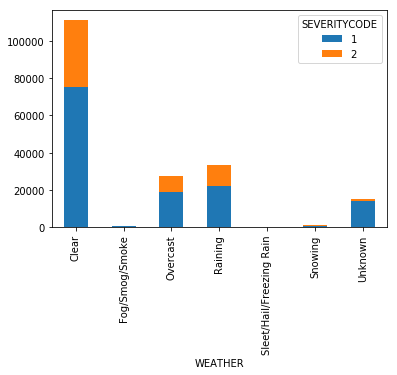

In [39]:
import matplotlib as plt
df.groupby(['WEATHER', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True)

Because the density 